4.1 Générez un vecteur contenant N = 100000 messages aléatoires s ∈ M = {1, 2, · · · , M }. On pourra notam-
ment importer la bibliothèque NumPy destinée à manipuler les matrices ou tableaux multidimensionnels.

In [60]:
import numpy as np

k = 3
size_M = np.power(2, k)

size_N = 100000
N = np.random.randint(size_M, size=size_N)
print(N)

[0 2 1 ... 4 3 0]


4.2 Def One hot


4.3. Appliquez un encodage one-hot pour chaque message. La matrice résultante sera donc de taille N × M .

In [61]:
matrix = np.zeros([size_N, size_M])
for i in range(0, size_N):
  message = np.zeros(size_M)
  message[N[i]] = 1
  matrix[i] = message

print(matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


4.4. Convertir la matrice en tenseur PyTorch.

In [62]:
import torch

tensor = torch.tensor(matrix)
print(tensor)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


5.

In [74]:
import numpy as np
import torch
from torch import nn

class Auto_Encoder(nn.Module):
  def __init__(self):
    super().__init__()

    size_M = 8
    size_x = 2

    self.encoder = nn.Sequential(
      nn.Linear(8, 4),
      nn.ReLU(),
      nn.Linear(4, 2),
    )

    self.decoder = nn.Sequential(
      nn.Linear(2, 4),
      nn.ReLU(),
      nn.Linear(4, 8),
      nn.Softmax(dim=1) #dim à expliquer
    )

  def forward(self, input):
    encoding = self.encoder(input) # tensor en taille 8 (message) -> encode -> x (complexe) taille 2 (partie réel, partie imaginaire)
    normal_layer = Normal_Layer()
    encoding = normal_layer(encoding)
    noise_layer = Noise_Layer()
    encoding = noise_layer(encoding)
    decoding = self.decoder(encoding) # x (encode) -> decode -> tensor taille 8
    return encoding, decoding

class Normal_Layer(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, input):
    return nn.functional.normalize(input, p=2, dim=1) #On a regardé pour la dimension et le p et on les met meme si c'est les valeurs par default, expliquer pq on les choisit

#Créer une fonction chanel dans la classe auto_encodeur et le mettre avant le decoding dans le forward
class Noise_Layer(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, input):
    matrix_rc = torch.randn(input.size(dim=0), input.size(dim=1))
    k = torch.log2(torch.tensor(input.size(dim=1))).item()
    factor = 1/torch.sqrt(torch.tensor(14*k))
    matrix_rc = factor.mul(matrix_rc)

    return input + matrix_rc

if torch.cuda.is_available():
      device = 'cuda'
else:
      device = 'cpu'
print(device)
model = Auto_Encoder().to(device)
print(model)

encoded, decoded = model(tensor.float())
print(encoded)
print(decoded)



cpu
Auto_Encoder(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): Softmax(dim=1)
  )
)
tensor([[ 0.6597, -0.2558],
        [ 0.7396, -0.0049],
        [ 0.2490,  0.1204],
        ...,
        [ 1.2443, -0.6412],
        [ 1.1204, -0.2032],
        [ 0.9080, -0.6317]], grad_fn=<AddBackward0>)
tensor([[0.0992, 0.0975, 0.1114,  ..., 0.1209, 0.1760, 0.1095],
        [0.1020, 0.0955, 0.1125,  ..., 0.1175, 0.1792, 0.1064],
        [0.0903, 0.1038, 0.1076,  ..., 0.1321, 0.1652, 0.1199],
        ...,
        [0.1020, 0.0955, 0.1125,  ..., 0.1175, 0.1792, 0.1064],
        [0.1020, 0.0955, 0.1125,  ..., 0.1175, 0.1792, 0.1064],
        [0.1020, 0.0955, 0.1125,  ..., 0.1175, 0.1792, 0.1064]],
       grad_fn=<SoftmaxBackwar

5.1
https://arxiv.org/pdf/1702.00832.pdf


5.6. Fonction d'activation : fonction qui détermine si un neurone artificiel doit être activé ou pas et, dans le premier cas, le degré de cette activation.


5.7. https://pytorch.org/docs/stable/generated/torch.nn.functional.normalize.html

In [ ]:
tensor = nn.functional.normalize(tensor, p=2, dim=1) #On a regardé pour la dimension et le p et on les met meme si c'est les valeurs par default

6. Apprentissage du modèle

Les auteurs utilisent la fonction de coût d’entropie croisée catégorielle (categorical cross-entropy). Cette fonc-
tion de coût est souvent utilisé pour la classification multi-classe, à l’instar de l’entropie croisée simple pour la
classification binaire. Pour l’algorithme d’optimisation, les auteurs utilisent Adam, avec un taux d’apprentissage
fixé à 0.001. Dans un premier temps, on fixe le nombre d’epochs à 50 et la taille du batch à 1000.

15. Entraînez le modèle d’auto-encodeur précédemment créé.

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, tensor):
        self.data = tensor

  def __len__(self):
      return len(self.data)

  def __getitem__(self, idx):
      return self.data[idx]

def train(dataloader, model, loss_fn, optim, device):
    model.train(True)
    for step, inputs in enumerate(dataloader):
        inputs = inputs.to(device)
        _, decoding = model(inputs.float())
        loss = loss_fn(decoding, inputs)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 10 == 0:
          print("Batch : " + str(step) + " Loss : " + str(loss.item() ))

def test(dataloader, model, device):
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
      for inputs in dataloader:
            inputs = inputs.to(device)
            _, decoding = model(inputs.float())
            predicted = decoding.argmax(1)
            inputs = inputs.argmax(1)
            total += inputs.size(0)
            correct += (predicted == inputs).sum().item()
  print('Précision : ' + str(100 * correct // total) + ' %')

if torch.cuda.is_available():
      device = 'cuda'
else:
      device = 'cpu'
print(device)
model = Auto_Encoder().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.001
epochs = 50
batch_size = 1000

optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_size = int(0.6 * len(tensor))
test_size = len(tensor) - train_size
train_tensor, test_tensor = torch.utils.data.random_split(tensor, [train_size, test_size])

train_dataset = CustomDataset(train_tensor)
test_dataset = CustomDataset(test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(epochs):
    print('Epochs : ' + str(epoch+1) + '/' + str(epochs))
    train(dataloader=train_dataloader, model=model, loss_fn=loss_fn, optim=optim, device=device)
    test(dataloader=test_dataloader, model=model, device=device)


8. Affichage de la constellation apprise

Dans cette partie, nous allons afficher la constellation apprise par le réseau de neurone. La constellation est le
placement dans le plan complexe de tous les symboles complexes possibles. Pour ce faire, on utilisera seulement la
partie encodeur du réseau. Ensuite, pour chaque réalisation possible de s, on récupère le symbole correspondant x. Pour le tracer de courbes et figures, il faut importer la bibliothèque Matplotlib.

19. Affichez grâce à la fonction scatter la constellation apprise par le réseau de neurone. Comparez cette
constellation à celle d’une traditionnelle M -PSK utilisée en communication numérique

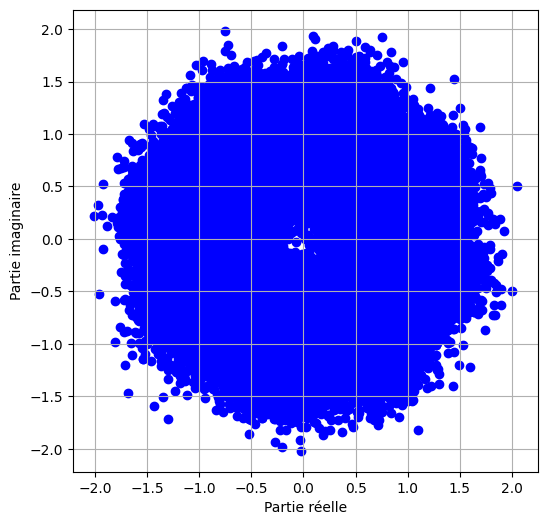

In [135]:
import matplotlib.pyplot as plt

def plot_constellation(decoder):
    plt.figure(figsize=(6, 6))
    plt.scatter(encoder[:, 0], encoder[:, 1], marker='o', color='b', label='constellation')
    plt.xlabel('Partie réelle')
    plt.ylabel('Partie imaginaire')
    plt.grid(True)
    plt.show()

with torch.no_grad():
  encoder, _ = model(tensor.float())
plot_constellation(encoder)


10.

In [ ]:
ser_8psk = [0.3478959 , 0.2926128, 0.2378847, 0.1854187, 0.1372344, 0.0953536, 0.0614003, 0.0360195, 0.0185215, 0.0082433, 0.0030178, 0.0008626, 0.0001903, 0.0000289, 0.0000027]
ebnodb_8psk = np.linspace(0, 14, 15)